## Natural Computing Assignment 4 (Classifier Combining, Bagging & Boosting)
####  Katrin Bujari(s1005213) Simge Ekiz(s4706757), Luca Parola(s1009497),

## Question 1.1

**a)**  
 In the second case, what is the probability that all three doctors give the correct answer? What is the probability that at least 2 doctors make the right call? Combining these results, what is the probability that this group makes the right decision based on majority voting?    
   
$P(a,b,c) = 0.8 * 0.8 * 0.8 = 0.512 $  
$P(a,b) = 0.8 * 0.8 = 0.64  $  
The probability that this group makes the right decision based on majority voting is
0.64.  

**b)**   
Can you come up with a general formula to calculate the probability that c doctors with competence p make the correct decision by ma- jority voting? Use it to calculate the probability of a correct decision for the group of medical students.    
  
$ F = \prod_{i=1}^n p_i$  where  $  n = (\frac{totalnumber}{2}) + 1 $    
$ n = (\frac{21}{2}) + 1 = 10.5 + 1 =11.5 ≃ 12$  
$F = 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 * 0.6 = 0.0036$  

**c)**  
Code a simulation to check your answer to the previous question, or, if you did not find a formula, use this simulation to answer the previous question.

In [1]:
m=21
n=int(m/2)+1

In [2]:
p=0.6
F=1

In [3]:
for i in range(0, n):
    F = F * p
print(F)

0.0036279705599999994


**d)**   
Make a graph of the probability of a correct decision for various sizes of the jury and different competence levels (p) of the individual doctors.  
The graph below has the jury size n = [4, 8, 12, 16, 19, 21 ] and the probability p = [0.9, 0.7, 0.5, 0.3].  
<img src="images/1-1-d.png" alt="graph for question 1.1.d">

**e)**  
Who has the highest chance to make the correct decision: the radiol- ogist, the group of doctors or the group of students? How big does the group of medical students need to be to make the probability of a correct decision (almost) equal to the prediction of the group of doctors?  
  
  
The highest chance to make the correct decision has the radiologist as the probability is 0.85 while for the doctors with majority voting is 0.64 and the lowest chance comes from students with 0.0036.
To make the probability of the doctors equal with the students we should have just one student as the result of doctors is 0.64 or 0.512 and one student has the probability of 0.6.

## Question 1.2  
**a)** Complete the table by filling in the values for the calculating the values produced by the different combiners and indicate which de- cision each combiner would make based on these values.  

<img src="images/1-2.png" alt="graph for question 1.2">  
Mean A = (0.9 + 0.9 + 0.0) / 3 = 0.6  
Product A = 0.9 * 0.9 *0.0 = 0.0  


## Question 1.3  
  
  When taking a bootstrap sample, typically, some observations from the dataset will be present twice, while others will not be present. In bagging, these left-out samples (called out-of-bag examples) are useful, because they will not be used in the construction of the classifier/decision tree, so they can be used to evaluate its performance. What percentage of the observations from the original sample of size N will not be present in the bootstrap sample? Derive a formula, or, alternately, code a simulation and plot its result for various sample sizes N. How does this percentage change for different sample sizes N? What percentage does it converge to?  

There is no defined percentage in that won’t be presented in bootstrap sample, but it is mostly around 37%.  
Theformulatocalculateitis: $1−(1 − 1/N)^N$  
For the graph below we used N = [100, 200, 400, 500, 760, 1200, ] sample size.  
<img src="images/1-3.png" alt="graph for question 1.3">  

## Question 1.4  
  
In your own words, explain the difference between bootstrapping and random subspaces.

> The bootstrapping and random subspace models are pretty same. However, there is a difference between this two, features. While in bootstrapping we create randomly sub-samples of the data set, in RSM we randomly sample the features. So, in bootstrapping we try to avoid the error caused from the small data set and in RSM we try to avoid the focus from the highly predictive features. Beside features, the other difference between bootstrapping and RSM is that bootstrapping is used more when we have small sample as, they are more convenient to mislead the result. On the other hand, RSM is used when we have high number of features but we ignore less predictive features.

## Question 1.5  
  
To explain the performance of a random forest model, people often turn to measures of variable importance to determine which variables are most important in obtaining the given result. Find out, in the literature, or, for instance, in the documentation of a random forest implementation, how this importance are typically calculated for random forests. In a few sentences, explain and critique this approach.

> Feature importance is measured by an approach called Mean Decrease Impurity (MDI).  Impurity is a measure of how often a randomly chosen and randomly labelled element would be labelled incorrectly. Nodes in decision trees are conditions on variables. When a node is splitted by a variable, the node impurity is decreased. And the importance measure of the variable is the sum of the actual decrease in node impurity caused by that variable and averaged across all trees. Importance of a feature is the ability of decreasing the impurity. However, this approach is biased towards variables that corresponds to more categories than others because such variables have advantage to split the dataset more times. 

## Question 1.6  
  
Find out what widely used random forest implementations are available in your favourite programming language and apply the method to a prediction problem you find interesting (see, for instance the UCI Machine Learning repository for interesting datasets). Write a short description (min. 100 words) of your findings, including what dataset and imple- mentation you used, how you set up your experiment, what the effect of different parameter settings was, what the performance was, which variables were important, etc.).

#### Data Preprocessing

We ran our tests on two different datasets; [Spambase dataset from UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/spambase) and the dataset provided by Kaggle for [Titanic: Machine Learning from Disaster (Titanic)](https://www.kaggle.com/c/titanic) challenge. Spambase dataset contains feature vectors instead of the text of the actual emails, and so, feature extraction step was not needed. Titanic dataset also contains feature vectors including features that can not be used to train classifier (e.g. the name and id of the passenger), which we eliminated during preprocessing. In Titanic dataset, values in _Sex_ and _Embarked_ features are given as strings, however, we have to replace them with integers to make the classifier work. Another preprocessing on Titanic dataset is filling the missing values with the median of the corresponding column.

#### Classification

We prefer to use Python programming language, and we trained the random forest classification implementation called _RandomForestClassifier_ in one of the most popular Python machine learning libraries, _scikit-learn_. Additionally, we implemented a wrapper function that fits a random forest classifier on a given data with given parameters, reports precision, recall and f1-scores, and draws a bar chart to visualize variable importances. To calculate variable importances, we used the built-in method in scikit-learn library. The
RandomForestClassifier class measures the variable importance scores by using Mean Decrease Impurity approach. 

Please note that _“variable importance”_ is called as _“feature importance”_ in scikit-learn documentations. We also used the two terms interchangeably in this report.

#### Parameters of RandomForestClassifier

In the scikit-learn random forest implementation, there are number of parameters we can play with. Below we explain the parameters we applied with some variety of values. In order to have maximum understanding of the effect caused by each parameter, we prefer to vary the parameters one at a time. Thus, while we try different values for one parameter, other parameters is set to default values. Additionally, random_state parameter is fixed to ‘0’ for each experiment to have reproducible results.

**max_features**: In the scikit-learn random forest implementation, the default max_features value is set to the square root of the total number of features in the datasets. We set this parameter to three different values; 1, square root of the total number of features and the total number of features. When max_features is 1, the trees in the forest are diverse and complicated. When max features is getting higher the trees in the forest will tend to be similar and simpler.

We observed that, the difference between the importance of each variable gets larger, when the max_features set to total number of features. When it is set to square root of the total number, the distribution of variable importances gets relatively more balanced. This effect is observed fairly more when applied to Spambase dataset. In Titanic dataset, it can still be observed that the importance of variables in the long tail is reduced.

**n_estimators**: This variable denotes the number of trees in the forest. In scikit-learn implementation the default of this parameter is 10. If we increase this parameter, the more trees are ensembled and this helps to reduce overfitting. However, increasing the number of trees increases the computational cost. We set this parameter to 1, 10, and 100 in our experiments.

We observed an increase in the performance scores with the increase of the number of estimators for both of the datasets we applied. An exception was a decrease when it was set to 100 for Titanic dataset.

**max_depth**: This parameter controls the maximum depth of the tree. The default value None is given, nodes are expanded until all leaves are pure. In other words the nodes will continue to be split until all leaves contain the same class or have fewer samples than the minimum sample split parameter value, which is 2. We set this parameter to 3 ,10 and to the default. 


Optimal max_depth is changing according to dataset and decision tree structure that changes according to randomness. In our example, for spam dataset highest results were observed when it was set to the default. However for Titanic we get the highest result when it was set to 10.

#### Overall Performances and Important Variables

The f1-scores for Spambase dataset differ between 90% to 94% based on the parameter settings. For the Titanic dataset, f1-score was around 80% generally.

The important variables for the Spambase dataset are the frequency of words “money”, “remove” and “your”, the frequency of characters “$” and “!” and the length of capital written words. For the Titanic dataset, the most important variables are sex and age of the passengers and the fare of their tickets.

In [4]:
import math
from numpy import argsort as np_argsort
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

######  Load and Preprocess  Spambase Data

In [5]:
# Load the columns names 
column_names = open('data/spambase/spambase-feature-names.txt', 'r').read().splitlines()
column_names.append('label')

# Load the data
spam_data = pd.read_csv('data/spambase/spambase.data', names=column_names)

# Print first two rows
spam_data.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


##### Load and Preprocess Titanic Data

In [6]:
# Load and select the columns are going to be used
titanic_data = pd.read_csv('data/titanic/train.csv')
titanic_data = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

# Rename Survived as label for compatibility with the random_forester function
titanic_data = titanic_data.rename(index=str, columns={'Survived': 'label'})

# Replace string values with integers in Sex and Embarked
titanic_data['Sex'] = titanic_data['Sex'].replace(['male', 'female'], [0, 1])
titanic_data['Embarked'] = titanic_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

# Substitute missing values in Age, Embarked & Fare;
titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data["Age"].median())
titanic_data["Fare"] = titanic_data["Fare"].fillna(titanic_data["Fare"].median())
titanic_data["Embarked"] = titanic_data["Embarked"].fillna(titanic_data["Embarked"].median())

# Print first two rows
titanic_data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,0,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1


#### Classification

In [7]:
def random_forester(data, parameters, print_report=True, print_ranking=False, draw_chart=True, test_size=0.33):
    
    # Separate the feature vector and the labels list
    X = data.loc[:, data.columns != 'label']
    y = data.label.values
    
    # Split data as train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize and fit RandomForestClassifier with the given parameters
    forest = RandomForestClassifier(**parameters)
    forest.fit(X_train, y_train)
    
    # Predict labels for test data and print classification report
    if print_report:
        predictions = forest.predict(X_test)
        print("Classification Report:\n")
        print(classification_report(y_test, predictions))
    
    # Calculate feature importance
    importances = forest.feature_importances_
    
    # Sort the features based on importance
    if print_ranking or draw_chart:
        indices = np_argsort(importances)[::-1]
    
    # Print the importance ranking of features
    if print_ranking:
        rankind_df = pd.DataFrame(columns=['feature_name', 'score'])
        for f in range(X_range):
            rankind_df.loc[f] = [X.columns[indices[f]], importances[indices[f]]]
        print('Ranking of feature importances:')
        print(rankind_df)
        
    # Visualize features and their importances
    if draw_chart:
        plt.figure(figsize=(10, 4))
        plt.title("Feature Importances")
        plt.bar(range(X.shape[1]), [imp*100 for imp in importances[indices]], color="b", align="center")
        plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.xlabel("Features (a.k.a variables)")
        plt.ylabel("Importance Ratio (%)")
        plt.show()

### max_features 
##### Variating the parameter max_features for Spambase Dataset. Here we set the max_features parameter to 1, square root of total number of features and finally to the total number of features.



-----------------  Setting max_features parameter to 1 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       886
          1       0.97      0.88      0.93       633

avg / total       0.94      0.94      0.94      1519



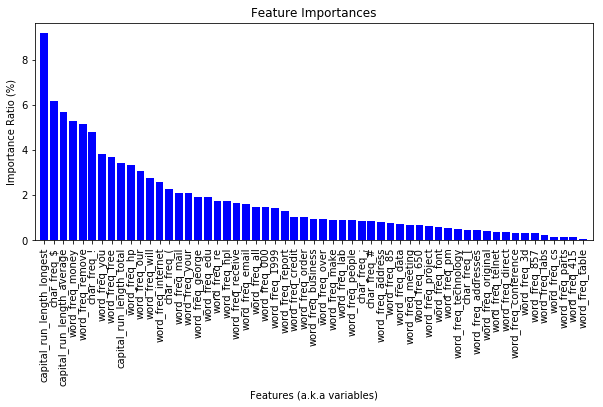


-----------------  Setting max_features parameter to 7 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       886
          1       0.97      0.91      0.94       633

avg / total       0.95      0.95      0.95      1519



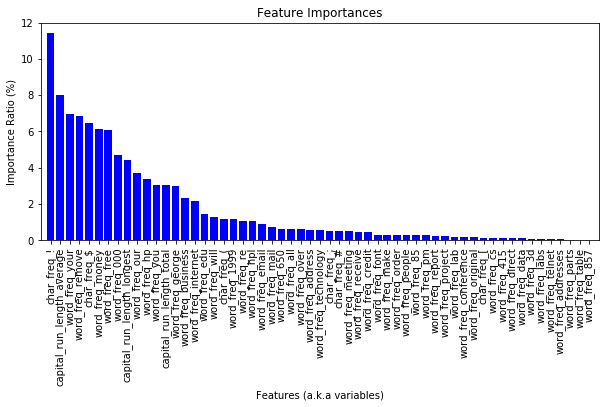


-----------------  Setting max_features parameter to 57 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       886
          1       0.95      0.89      0.92       633

avg / total       0.94      0.94      0.94      1519



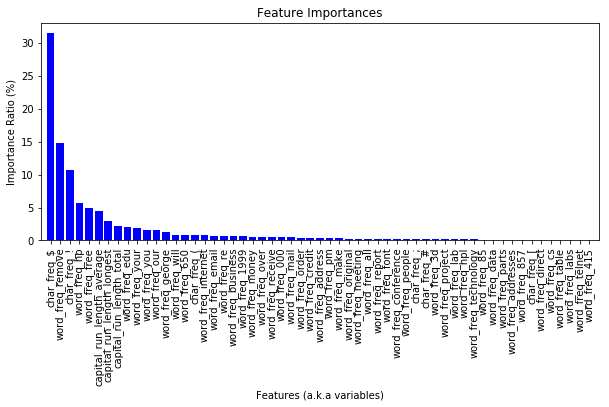

In [8]:
data = spam_data

total_num_features = data.shape[1]-1

max_features_options = [1, int(math.sqrt(total_num_features)), total_num_features]

for max_feat_param in max_features_options:
    print('\n-----------------  Setting max_features parameter to {} ----------------\n'.format(max_feat_param))
    parameters = {'max_features': max_feat_param, 'random_state': 0}
    random_forester(data, parameters)

### max_features 
##### Variating the parameter max_features for Titanic Dataset


-----------------  Setting max_features parameter to 1 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.82      0.82      0.82       175
          1       0.74      0.74      0.74       120

avg / total       0.79      0.79      0.79       295



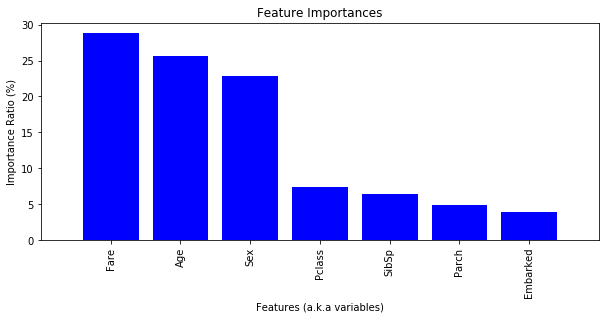


-----------------  Setting max_features parameter to 2 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.80      0.83      0.81       175
          1       0.74      0.70      0.72       120

avg / total       0.77      0.78      0.78       295



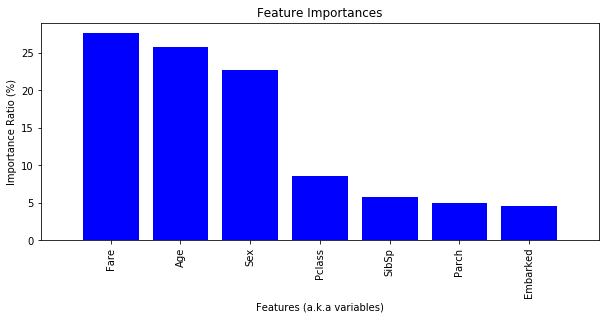


-----------------  Setting max_features parameter to 7 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.81      0.83      0.82       175
          1       0.75      0.72      0.73       120

avg / total       0.79      0.79      0.79       295



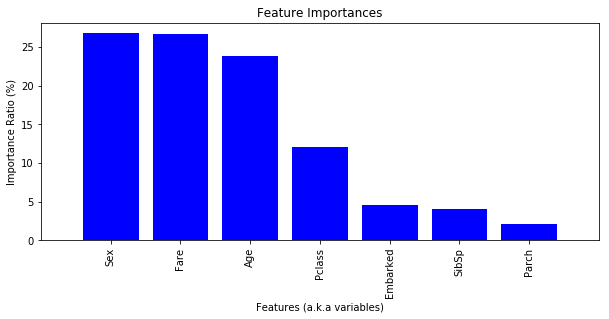

In [9]:
data = titanic_data

total_num_features = data.shape[1]-1

max_features_options = [1, int(math.sqrt(total_num_features)), total_num_features]

for max_feat_param in max_features_options:
    print('\n-----------------  Setting max_features parameter to {} ----------------\n'.format(max_feat_param))
    parameters = {'max_features': max_feat_param, 'random_state': 0}
    random_forester(data, parameters)

### n_estimators 
##### Variating the parameter n_estimators  for Spambase Dataset. Here we set the n_estimators parameter to 1, 10, 50 

In [10]:
data = spam_data

total_num_features = data.shape[1]-1

n_estimators_options = [1, 10, 100]

for n_estimator in n_estimators_options:
    print('\n-----------------  Setting n_estimators parameter to {} ----------------\n'.format(n_estimator))
    parameters = {'n_estimators': n_estimator, 'random_state': 0}
    random_forester(data, parameters, draw_chart=False)


-----------------  Setting n_estimators parameter to 1 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.91      0.90      0.90       886
          1       0.86      0.87      0.86       633

avg / total       0.89      0.89      0.89      1519


-----------------  Setting n_estimators parameter to 10 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       886
          1       0.97      0.91      0.94       633

avg / total       0.95      0.95      0.95      1519


-----------------  Setting n_estimators parameter to 100 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       886
          1       0.96      0.94      0.95       633

avg / total       0.96      0.96      0.96      1519



### n_estimators 
##### Variating the parameter n_estimators  for Titanic Dataset. Here we set the n_estimators parameter to 1, 10, 50 

In [11]:
data = titanic_data

total_num_features = data.shape[1]-1

n_estimators_options = [1, 10, 100]

for n_estimator in n_estimators_options:
    print('\n-----------------  Setting n_estimators parameter to {} ----------------\n'.format(n_estimator))
    parameters = {'n_estimators': n_estimator, 'random_state': 0}
    random_forester(data, parameters,  draw_chart=False)


-----------------  Setting n_estimators parameter to 1 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.77      0.77      0.77       175
          1       0.66      0.66      0.66       120

avg / total       0.72      0.72      0.72       295


-----------------  Setting n_estimators parameter to 10 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.80      0.83      0.81       175
          1       0.74      0.70      0.72       120

avg / total       0.77      0.78      0.78       295


-----------------  Setting n_estimators parameter to 100 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.79      0.83      0.81       175
          1       0.74      0.68      0.71       120

avg / total       0.77      0.77      0.77       295



### max_depth
##### Variating the parameter max_depth for Spambase Dataset. Here we set the max_depth parameter to 3 and None(default)

In [12]:
data = spam_data

total_num_features = data.shape[1]-1

max_depth_options = [3,10, None]

for max_depth in max_depth_options:
    print('\n-----------------  Setting n_estimators parameter to {} ----------------\n'.format(max_depth))
    parameters = {'max_depth': max_depth, 'random_state': 0}
    random_forester(data, parameters,  draw_chart=False)


-----------------  Setting n_estimators parameter to 3 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.86      0.98      0.91       886
          1       0.96      0.77      0.86       633

avg / total       0.90      0.89      0.89      1519


-----------------  Setting n_estimators parameter to 10 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       886
          1       0.96      0.90      0.93       633

avg / total       0.95      0.94      0.94      1519


-----------------  Setting n_estimators parameter to None ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       886
          1       0.97      0.91      0.94       633

avg / total       0.95      0.95      0.95      1519



### max_depth
##### Variating the parameter max_depth for Titanic Dataset. Here we set the max_depth parameter to 3 and none(default)

In [13]:
data = titanic_data

total_num_features = data.shape[1]-1

max_depth_options = [3,10, None]

for max_depth in max_depth_options:
    print('\n-----------------  Setting max_depth parameter to {} ----------------\n'.format(max_depth))
    parameters = {'max_depth': max_depth, 'random_state': 0}
    random_forester(data, parameters,  draw_chart=False)


-----------------  Setting max_depth parameter to 3 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.78      0.92      0.85       175
          1       0.84      0.62      0.72       120

avg / total       0.81      0.80      0.79       295


-----------------  Setting max_depth parameter to 10 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       175
          1       0.80      0.72      0.76       120

avg / total       0.81      0.81      0.81       295


-----------------  Setting max_depth parameter to None ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.80      0.83      0.81       175
          1       0.74      0.70      0.72       120

avg / total       0.77      0.78      0.78       295



## Question 2.1

In the AdaBoost.M1 algorithm, in each step a base-learner is added to the
ensemble with a weight that depends on its (weighted) error. Derive this
weight of the added tree, Equation 10.12 on page 344 of The Elements of
Statistical Learning (Exercise 1, Chapter 10).

We start from the expression 10.11


$$(e^β − e^{−β})\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) + e^{-β}\:\Sigma{^n}_{i=1}w^{(m)}_i$$


To minimize this expression we will have to take the derivative and set it to 0 and then solve for $\beta$



$$(e^β + e^{-β})\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) - e^{-β}\:\Sigma{^n}_{i=1}w^{(m)}_i\:=\:0$$


Then to make it simpler we mulitply by $e^β$ . The expression then becomes:


$$(e^{2β} + 1)\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) - \:\Sigma{^n}_{i=1}w^{(m)}_i\:=\:0$$


Therefore we will have that $e^{2β} $ is:


$$e^{2β}=\frac{\Sigma{^n}_{i=1}w^{(m)}_i \:-\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) }{\Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i))}$$


Now we know that the $err_m$ is defined as:


$$err_m= \frac{\Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i))}{\Sigma{^n}_{i=1}w^{(m)}_i}$$


So we can just substitute this expression. Therefore the $e^{2\beta}$ becomes:

$$e^{2β}=\frac{1}{err_m}-1=\frac{1-err_m}{err_m}$$

Now we can just solve for $\beta$: 


$$\beta=\frac{1}{2}log\left(\frac{1-err_m}{err_m}\right)$$

## Question 2.2

Plot the weight given to a base-learner in the AdaBoost algorithm for
different values of the error the base-learner makes. Explain what you
see. What does it mean for these weights if we assume the base-learners
are weak-learners? What happens to the weights if the probability of
error of the base-learner is > 0.5 and why?

In [14]:
import matplotlib.pyplot as plt 
import numpy as np

In [15]:
#We initialize the errors from 0.01 to 1 every 0.01
errors=np.arange(0.01, 1, 0.01)

In [16]:
#We compute the alpha(the weight) for each error rate
weigths=[]
for i in range(len(errors)):
    alpha_m=np.log(((1-errors[i])/errors[i]))
    weigths.append(alpha_m)

No handles with labels found to put in legend.


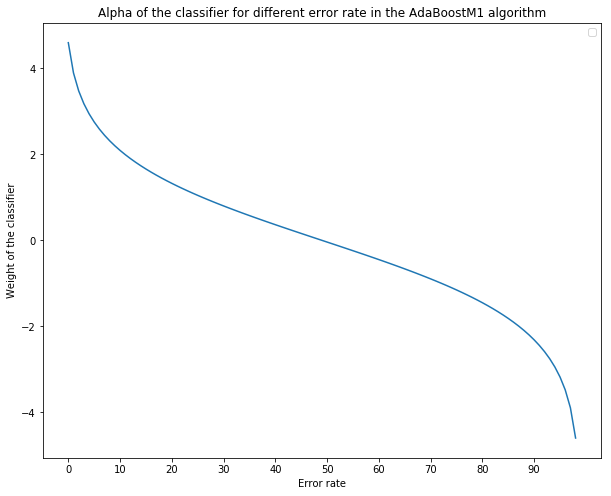

In [17]:
#Now we can plot the results
plt.figure(1,figsize=(10,8))
plt.title("Alpha of the classifier for different error rate in the AdaBoostM1 algorithm")
plt.xlabel("Error rate")
plt.ylabel("Weight of the classifier")
plt.plot(weigths)
plt.xticks(np.arange(0,100,10))
plt.legend()
plt.show()

As we see from the above plot, when the error rate cross the 50% , the weight become negative as we may have expected. This means that the worse a classifier performs, the less it counts in the strong learner. 

## Question 2.3

In your own words, explain some of the main differences between bagging and boosting.

Boosting is a technique used to build a strong learner from multiples weak learners, where a weak learner is defined as a model whose probability of outputting the right prediction is just above chance with an edge of   $\gamma$ . The weak learners are integrated weighing their performance. Therefore the weak learner that performs worse than the others, will count less when integrated in the strong learner. In addition to this, after that a weak learner is added to the strong learner, the data that were correclty classified by this weak learner, will count less in the training of the next weak learner,while the misclassified datapoint will weigh more. Doing so means that each next weak learner will be more inclined to classify the samples miscalissified by the previous learners.
Bagging , which is a crasis of B(oostrap) AGG(regat)ING , is another ensemble algorithm which aims to improve the accuracy of a machine learning algorithm (usually decision three). It works as follows: from a dataset X , other n  X1...Xn different training dataset are built ( can have less or the same number of data point of the original dataset) with samples that are drawn uniformly and with replacment from the original dataset . This means that a sample can be present in many new datasets. Then it fits n models with the different training sets and it avarages the output, which can be the mean in the case of a regression problem, or just picking the output which has the most "votes"  from the models, in the case of a classification problem. 

## Question 2.4

How does AdaBoost relate to gradient boosting?

Both AdaBoost and gradient boosting try to do the same thing, which is to combine many weak learners in a strong one to minimize the error of the classifier. Both can be thought as Arcing algorithm , which " is an acronym for Adaptive Reweighting and Combining. Each step in an arcing algorithm consists of a weighted minimization followed by a recomputation of the classifiers and weighted input.", as stated by Leo Breiman. The two algorithms differ on the way they train the weak learners. 
On one hand Adaboost trains the new weak learner changing the sample distribution adjusting the weights from the previous iteration. Doing this means that each next weak lernear will be more inclined to focus on the samples that were wrongly classified by the previous weak learner, as these will weigh more.AdaBoost also adjust the weights of the weak learner in the strong learner according to the error rate, so the better a weak learner performs, the more it will be counted its "vote" win the final classifier.
On the other hand, gradient boosting does not changes the sample distribution. In this case the weak learners are added in order to optimize a loss function, in a gradient descent fashion. Therefore the starting point is to have a model with a certain loss on a train set, and from there add at each iteration a weak learner that points the loss function towards a minimum. So the goal is to find an $F1(x)$ such that $F1(x)=F0+f(x)=y$ where y is the true value of the sample. This means that gradient boosting can be used with different kind of error functions , given that are differentiable, and also can be used on regression problems.

## Question 2.5

Similar to what you did for the random forest, find out what widely used
gradient boosting or AdaBoost implementations are available in your
favourite programming language and apply the method to a prediction
problem you find interesting (see, for instance the UCI Machine Learning
repository for interesting datasets). Write a short description (min. 100
words) of your findings, including what dataset and implementation you
used, how you set up your experiment, what the effect of different parameter
settings was, what the performance was, which variables where
important, etc.).

For the exercise we will try to predict wheter a person has diabates or not. The database can be found here: https://www.kaggle.com/uciml/pima-indians-diabetes-database. We have the following dimensions :

Pregnancies (Number of times pregnant),Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test), BloodPressure (Diastolic blood pressure (mm Hg)), SkinThickness (Triceps skin fold thickness (mm)), Insulin (2-Hour serum insulin (mu U/ml)), BMI (Body mass index (weight in kg/(height in m)^2)), DiabetesPedigreeFunction (Diabetes pedigree function), Age (Age (years)), Outcome (Class variable (0 or 1))

For the exercise we use the AdaBoost Classifier which is parte of the sklearn package. 

In [18]:
import pandas as pd

In [19]:
##we import the dataset
diab_pd = pd.read_csv("data/diabetes.csv")

In [20]:
diab_pd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
model=AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

We take the values(X) from the dataset to fit the model as well as the classes(Y)

In [23]:
array = diab_pd.values

X=array[:,0:8]
Y=array[:,8:9]

Then we can train the model. We will start from a baseline and then try to change the relevant parameters of the algorithm to see how the resuls may change

We start with 30 trees

In [24]:
seed=5
model = AdaBoostClassifier(n_estimators=30, random_state=seed)

In [25]:
model.fit(X,Y.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=30, random_state=5)

In [26]:
model.score(X,Y)

0.8033854166666666

Then we can try to change the number of trees and see if and how the score changes accordingly



In [27]:
model1 = AdaBoostClassifier(n_estimators=50, random_state=seed)

In [28]:
model1.fit(X,Y.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=5)

In [29]:
model1.score(X,Y)

0.82421875

It looks that incresing the number of tree increases the accuracy as we could have expected.
We can try to build different model adding each time 10 trees and then plot the score according to the number of trees.
We also save the importance given to each attributes of the dataset for each iteration.

In [30]:
##We take the columns names from the dataset
attributes=diab_pd.columns.values

Now we can build the different modesl and see how each performs. We also store the relative importance given to each attribute to plot later.

In [31]:
scores=[]
importances=[]
for i in range(10,500,10):
    model=AdaBoostClassifier(n_estimators=i, random_state=seed)
    model.fit(X,Y.ravel())
    scores.append(model.score(X,Y))
    importance=model.feature_importances_
    index=0
    importances.append(importance)

In [32]:
importances=np.asarray(importances)

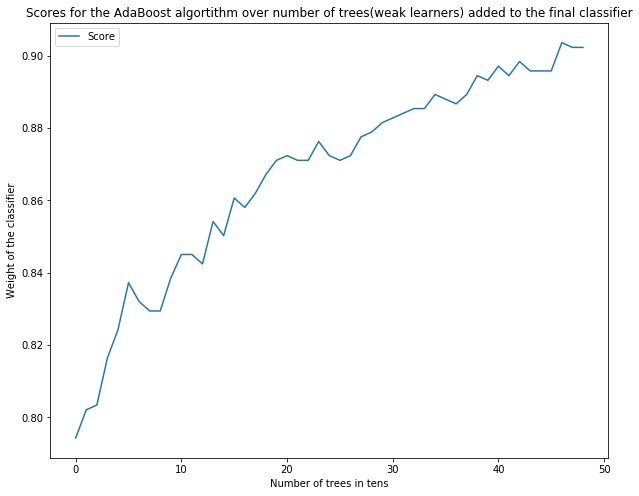

In [33]:
plt.figure(1,figsize=(10,8))
plt.title("Scores for the AdaBoost algortithm over number of trees(weak learners) added to the final classifier")
plt.xlabel("Number of trees in tens")
plt.ylabel("Weight of the classifier")
plt.plot(scores,label=("Score"))
plt.legend()
plt.show()

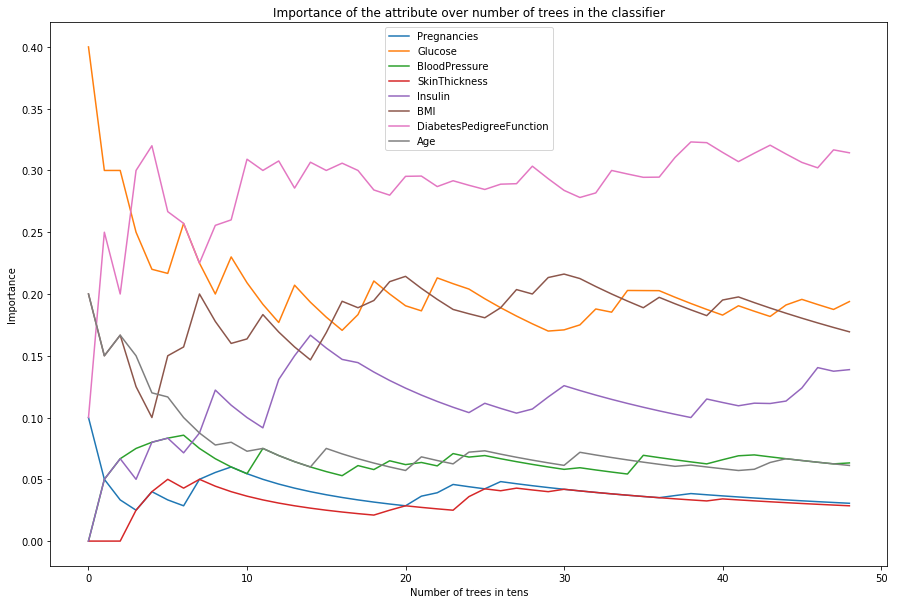

In [34]:
plt.figure(1,figsize=(15,10))
plt.title("Importance of the attribute over number of trees in the classifier")
plt.xlabel("Number of trees in tens")
plt.ylabel("Importance")
for i in range(0,np.shape(importances)[1]):
    name=attributes[i]
    plt.plot(importances[:,i:i+1],label=name)
plt.legend()
plt.show()

As we see from the above plots we can say that the ensemble method in this case works decently. We reach a maximum of just above 90% of correct classification with 500 weak learner, and we would expect the score to improve a little bit more adding each time more tree and then level off. On the second plot we can see how en each strong learner, the importance given to each attribute of the dataset changes. Although we can see a certain degree until we start building models with 100 trees, then the importances become relatively more stable. 